In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
dataset = pd.read_csv('./diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes = dataset.values[:,:]
print(diabetes[:20,:])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01 1.000e+00]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01 0.000e+00]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01 1.000e+00]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01 0.000e+00]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01 1.000e+00]
 [5.000e+00 1.160e+02 7.400e+01 0.000e+00 0.000e+00 2.560e+01 2.010e-01
  3.000e+01 0.000e+00]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01 1.000e+00]
 [1.000e+01 1.150e+02 0.000e+00 0.000e+00 0.000e+00 3.530e+01 1.340e-01
  2.900e+01 0.000e+00]
 [2.000e+00 1.970e+02 7.000e+01 4.500e+01 5.430e+02 3.050e+01 1.580e-01
  5.300e+01 1.000e+00]
 [8.000e+00 1.250e+02 9.600e+01 0.000e+00 0.000e+00 0.000e+00 2.320e-01
  5.400e+01 1.000e+00]
 [4.000e+00 1.100e+02 9.200e+01 0.000e+00 0.000e+0

In [ ]:
# Set the independent variables from Pregnancies to Age. Dependent variable is outcome.
X = diabetes[:,0:8]
Y = diabetes[:,8]

In [ ]:
print('X=', X[0:5])

X= [[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]


In [ ]:
print('Y=', Y[0:5])

Y= [1. 0. 1. 0. 1.]


In [ ]:
# Splitting the datasets to training and validation sets.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [ ]:
# Feature scaling between 0 and 1 for independent variables using Standardization.

from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_X = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.fit_transform(X_test)

In [ ]:
print('New X_train =', X_train_sc[0:5])

New X_train = [[ 0.90832902  0.91569367  0.44912368  0.52222619  0.3736349   0.37852648
   0.67740401  1.69955804]
 [ 0.03644676 -0.75182191 -0.47230103  0.14814855 -0.69965674 -0.50667229
  -0.07049698 -0.96569189]
 [-1.12606292  1.38763205  1.06340683  0.77161128  5.09271083  2.54094063
  -0.11855487 -0.88240283]
 [-0.8354355  -0.37427121 -0.67706208  0.02345601  0.45029859 -0.88604319
   1.10091422 -0.88240283]
 [ 1.19895644 -0.02818307 -3.54371676 -1.28581572 -0.69965674 -0.27904975
  -0.85143778  0.36693308]]


In [ ]:
# Construct a confusion matrix
from sklearn.model_selection import train_test_split
test_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= test_size, random_state = seed)
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train_sc, Y_train)
predicted = model.predict(X_test_sc)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[94 13]
 [18 29]]


In [ ]:
from sklearn.model_selection import train_test_split
test_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= test_size, random_state = seed)
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train_sc, Y_train)
predicted = model.predict(X_test_sc)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       107
         1.0       0.69      0.62      0.65        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154



Text(0.5, 257.44, 'Predicted label')

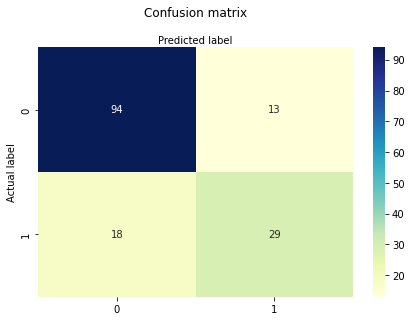

In [ ]:
# Visualize the confusion matrix using Heatmap
import seaborn as sns
from matplotlib.colors import ListedColormap
class_names=[0,1] # name of classes
fid, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')